<a href="https://colab.research.google.com/github/saikiransrichurnam/Localrepo/blob/main/cats%26dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/saikiransrichurnam/cat-vs-dog-project.git

Cloning into 'cat-vs-dog-project'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 18 (delta 2), reused 5 (delta 0), pack-reused 0
Receiving objects: 100% (18/18), 4.95 KiB | 4.95 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:17<00:00, 68.8MB/s]
100% 1.06G/1.06G [00:17<00:00, 65.4MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,MaxPooling2D,Dropout

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size =32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 3807s 6s/step - loss: 1.3193 - accuracy: 0.5776 - val_loss: 0.6385 - val_accuracy: 0.6350
Epoch 2/10
625/625 [==============================] - 3810s 6s/step - loss: 0.6332 - accuracy: 0.6307 - val_loss: 1.3068 - val_accuracy: 0.6090
Epoch 3/10
625/625 [==============================] - 3942s 6s/step - loss: 0.5606 - accuracy: 0.6909 - val_loss: 0.5686 - val_accuracy: 0.6400
Epoch 4/10
625/625 [==============================] - 3709s 6s/step - loss: 0.4772 - accuracy: 0.7491 - val_loss: 0.5207 - val_accuracy: 0.7490
Epoch 5/10
625/625 [==============================] - 3708s 6s/step - loss: 0.4307 - accuracy: 0.7746 - val_loss: 0.5662 - val_accuracy: 0.7662
Epoch 6/10
625/625 [==============================] - 3715s 6s/step - loss: 0.3866 - accuracy: 0.7973 - val_loss: 0.5303 - val_accuracy: 0.7380
Epoch 7/10
625/625 [==============================] - 3713s 6s/step - loss: 0.3306 - accuracy: 0.8227 - val_loss: 0.5443 - val_accuracy:

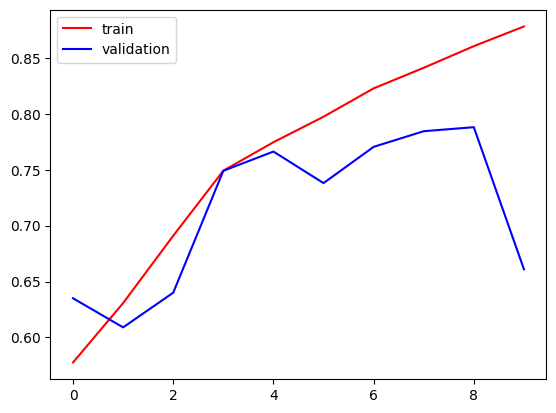

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

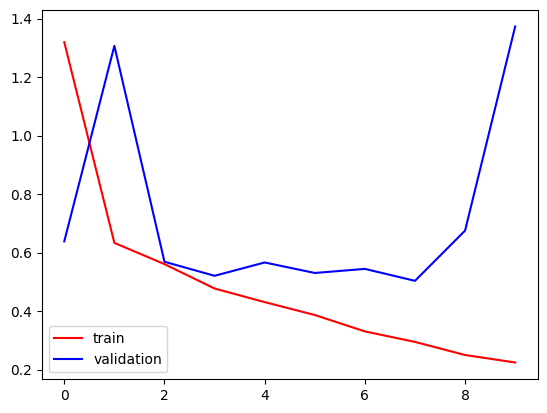

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_image = cv2.imread('/content/cat image')

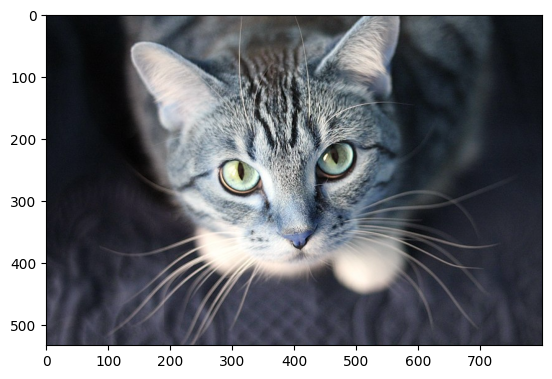

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape

(533, 800, 3)

In [ ]:
test_image = cv2.resize(test_image,(256,256))

In [ ]:
test_input = test_image.reshape(1,256,256,3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 1s 663ms/step


array([[0.]], dtype=float32)